# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yudha Perwira Bima Sakti
- **Email:** yudhapbs28@gmail.com
- **ID Dicoding:** ypbsunknown

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim/season terhadap jumlah total sewa sepeda ?
- Bagaimana pengaruh cuaca/weathers terhadap jumlah total sewa sepeda ?

## Import Semua Packages/Library yang Digunakan

- import numpy as np: Mengimpor pustaka NumPy, yang menyediakan dukungan untuk operasi matematika dan array multidimensi. NumPy sering digunakan dalam analisis data dan pengolahan numerik

- import pandas as pd: Mengimpor pustaka Pandas, yang menyediakan struktur data fleksibel dan alat analisis data untuk bahasa pemrograman Python. Pandas sangat berguna untuk membaca, memanipulasi, dan menganalisis data tabular

- import matplotlib.pyplot as plt: Mengimpor modul pyplot dari pustaka Matplotlib, yang digunakan untuk membuat visualisasi grafik dan plot. Matplotlib adalah salah satu pustaka visualisasi data paling populer di Python

- import seaborn as sn: Mengimpor pustaka Seaborn, yang merupakan pustaka tingkat tinggi untuk visualisasi data berdasarkan Matplotlib. Seaborn menyediakan antarmuka yang lebih mudah digunakan untuk membuat plot statistik yang menarik

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

- pd.read_csv("day.csv"): Menggunakan Pandas untuk membaca file CSV dengan nama "day.csv" dan memuatnya ke dalam sebuah dataframe yang disimpan dalam variabel rental_df

- rental_df.head(): Menampilkan lima baris pertama dari dataframe rental_df untuk memberikan gambaran awal tentang struktur dan isinya. Metode head() digunakan untuk membatasi tampilan agar hanya menampilkan sejumlah baris tertentu dari dataframe

In [ ]:
rental_df = pd.read_csv("day.csv")
rental_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

- rental_df.info() digunakan untuk memberikan informasi rinci tentang dataframe rental_df. Fungsi ini memberikan ringkasan tentang struktur dan tipe data di setiap kolom, jumlah nilai non-null, dan penggunaan memori

In [ ]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

- rental_df.isna().sum() digunakan untuk menghitung jumlah nilai null (NaN) dalam setiap kolom dataframe rental_df. Hasilnya akan memberikan informasi tentang berapa banyak nilai null yang ada di setiap kolom

In [ ]:
rental_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", rental_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore ...

- describe pada dataframe rental_df dengan parameter include="all" digunakan untuk memberikan statistik deskriptif tentang seluruh kolom dalam dataframe, termasuk kolom dengan tipe data non-numeric

In [ ]:
rental_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


- groupby(by="season"): Mengelompokkan data berdasarkan nilai dalam kolom "season" (musim). Ini berarti operasi agregasi akan dilakukan untuk setiap nilai unik dalam kolom "season".

- .agg({ "instant": "nunique", "cnt": ["max", "min", "mean", "std"] }): Menggunakan metode agg untuk melakukan beberapa operasi agregasi.


In [ ]:
rental_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

- groupby(by="weathersit"): Mengelompokkan data berdasarkan nilai dalam kolom "weathersit" (cuaca). Ini berarti operasi agregasi akan dilakukan untuk setiap nilai unik dalam kolom "season".

- .agg({ "instant": "nunique", "cnt": ["max", "min", "mean", "std"] }): Menggunakan metode agg untuk melakukan beberapa operasi agregasi.

In [ ]:
rental_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

- groupby pada dataframe rental_df dilakukan untuk mengelompokkan data berdasarkan dua kolom, yaitu "season" (musim) dan "weathersit" (situasi cuaca). Setelah melakukan pengelompokan, digunakan metode nunique() untuk menghitung jumlah nilai unik dari kolom "instant" pada setiap kelompok. Selanjutnya, dilakukan pengurutan (sorting) secara menurun (descending) berdasarkan jumlah nilai unik.

In [ ]:
rental_df.groupby(by="season").instant.nunique().sort_values(ascending=False)
rental_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

- rental_df: Merupakan nama dataframe yang digunakan sebagai dasar untuk membuat salinan.

- .copy(): Metode ini digunakan untuk membuat duplikat dari dataframe. Penggunaan .copy() penting karena membuat salinan yang independen dari dataframe asli, sehingga perubahan yang dilakukan pada salinan tidak akan mempengaruhi dataframe asli.

In [ ]:
all_df = rental_df.copy()
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Visualization & Explanatory Analysis

### Pertanyaan 1:

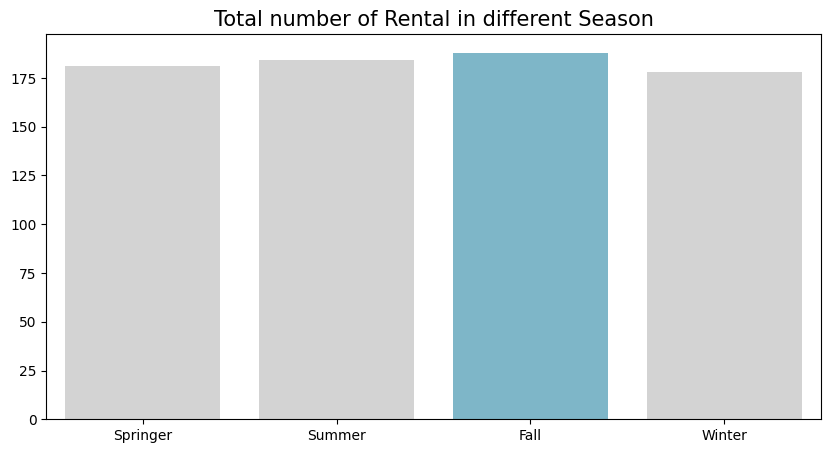

In [ ]:
# Functionality:
# - Menggunakan groupby untuk menghitung jumlah unik dari kolom "instant" berdasarkan musim.
# - Mengubah nama kolom hasil perhitungan menjadi "cnt".
# - Menyiapkan DataFrame hasilnya untuk plot musiman.
season_df = all_df.groupby(by="season").instant.nunique().reset_index()
season_df.rename(columns={
    "instant": "cnt"
}, inplace=True)

# Mapping Season Labels and Plotting Bar Plot
season_mapping = {1: 'Fall', 2: 'Summer', 3: 'Springer', 4: 'Winter'}
season_df['season_label'] = season_df['season'].map(season_mapping)

plt.figure(figsize=(10, 5))

# Colors for Bar Plot
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3",]

# Functionality:
# - Membuat pemetaan untuk menggantikan angka musim dengan label yang sesuai (misalnya, 1 menjadi 'Fall').
# - Menambahkan kolom baru ("season_label") ke DataFrame yang berisi label musim.
# - Membuat objek plot menggunakan `barplot` dari seaborn.
# - Mengatur ukuran gambar dan memberikan warna batang sesuai dengan daftar warna (`colors`).
# - Plotting menggunakan data yang diurutkan berdasarkan jumlah sewa (`cnt`).
# - Legenda dinonaktifkan (`legend=False`).
sn.barplot(
    y="cnt",
    x="season",
    hue="season",
    data=season_df.sort_values(by="cnt", ascending=False),
    palette=colors,
    legend=False
)
# Functionality:
# - Menyesuaikan penanda sumbu x dengan label musim yang diurutkan berdasarkan jumlah sewa.
# - Menambahkan judul plot dan menyesuaikan tata letak.
# - Menghilangkan label sumbu y dan x.
# - Menyesuaikan parameter tata letak sumbu x.
plt.xticks(ticks=range(4), labels=season_df.sort_values(by="cnt", ascending=False)['season_label'])
plt.title("Total number of Rental in different Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
# - Menampilkan plot yang telah dibuat.
plt.show()

### Pertanyaan 2:

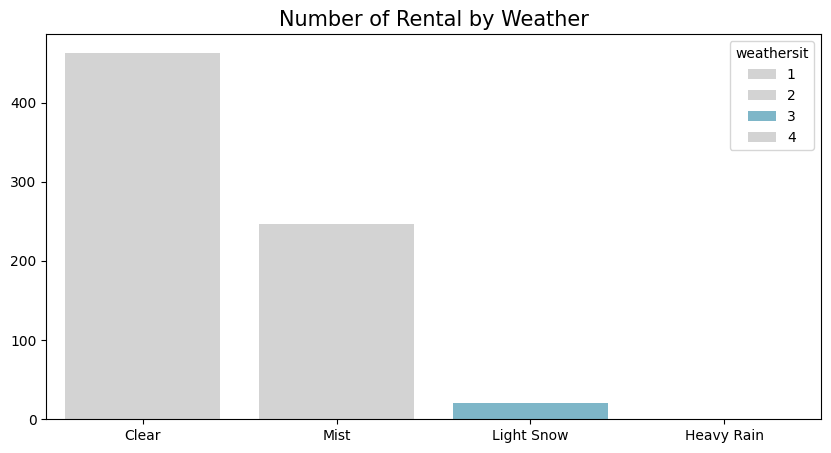

In [ ]:
# Functionality:
# - Menggunakan groupby untuk menghitung jumlah unik dari kolom "instant" berdasarkan kondisi cuaca.
# - Mengubah nama kolom hasil perhitungan menjadi "cnt".
# - Menyiapkan DataFrame hasilnya untuk plot cuaca.
weather_df = all_df.groupby(by="weathersit").instant.nunique().reset_index()
weather_df.rename(columns={
    "instant": "cnt"
    }, inplace=True)

# Functionality:
# - Membuat pemetaan untuk menggantikan angka kondisi cuaca dengan label yang sesuai.
# - Menambahkan baris tambahan untuk "Heavy Rain" dengan jumlah sewa 0.
# - Menggunakan `pd.concat` untuk menggabungkan DataFrame tambahan ke DataFrame utama.
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow',
    4: 'Heavy Rain'
}
weather_df['weather_label'] = weather_df['weathersit'].map(weather_mapping)

extra_row = pd.DataFrame({'weathersit': [4], 'cnt': [0], 'weather_label': ['Heavy Rain']})
weather_df = pd.concat([weather_df, extra_row], ignore_index=True)

# Plotting Weather Rental Bar Plot
plt.figure(figsize=(10, 5))

# Colors for Bar Plot
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

# Functionality:
# - Membuat objek plot menggunakan `barplot` dari seaborn.
# - Mengatur ukuran gambar dan memberikan warna batang sesuai dengan daftar warna (`colors`).
# - Plotting menggunakan data yang diurutkan berdasarkan jumlah sewa (`cnt`).
# - Menentukan urutan label pada sumbu x dan warna pada hue.
# - Menyesuaikan penanda sumbu x dengan label cuaca yang diurutkan berdasarkan jumlah sewa.
sn.barplot(
    y="cnt",
    x="weathersit",
    hue="weathersit",
    data=weather_df.sort_values(by="cnt", ascending=False),
    palette=colors,
    order=[1, 2, 3, 4],
    hue_order=[1, 2, 3, 4]
)

plt.xticks(ticks=range(4), labels=weather_df.sort_values(by="cnt", ascending=False)['weather_label'])

plt.title("Number of Rental by Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
# - Menampilkan plot yang telah dibuat.
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Musim / season tampak tidak terlalu memengaruhi jumlah rental perusahaan, hal tersebut tampak dari selisih tiap musim yang tidak signifikan. Perbandingan data dalam bentuk Bar Chart memperjelas kesimpulan bahwa musim tidak memiliki peran yang signifikan dalam banyak maupun sedikitnya jumlah rental.

- Conclution pertanyaan 2
- Cuaca / weather sangat berbeda dengan musim, pengaruh cuaca sangat berpengaruh terhadap banyak sedikitnya jumlah rental perusahaan. Bar Chart menunjukkan bahwa cuaca dengan kategori Heavy Rain tidak memiliki jumlah rental sepeda baik untuk pengguna kasual (casual) maupun terdaftar(registered).